In [ ]:
# Google Colab에서 Kaggle API를 사용하기 위한 라이브러리 설치
!pip install kaggle

# Kaggle API 토큰 업로드
from google.colab import files
files.upload()

In [ ]:
# 업로드한 Kaggle API 토큰 파일 확인
ls -1ha kaggle.json

kaggle.json


In [ ]:
# Kaggle API 토큰을 사용자 디렉토리로 복사하고 권한 설정
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Kaggle에서 데이터셋 다운로드
!kaggle datasets download -d bpmtips/websiteiabcategorization

 35% 6.00M/16.9M [00:00<00:00, 57.3MB/s]
100% 16.9M/16.9M [00:00<00:00, 105MB/s] 


In [ ]:
!ls

kaggle.json  sample_data  websiteiabcategorization.zip


In [ ]:
# 다운로드한 데이터셋 압축 해제
!unzip websiteiabcategorization.zip

Archive:  websiteiabcategorization.zip
  inflating: training_data.csv       
  inflating: training_data_en.csv    


In [ ]:
# 필요한 라이브러리 설치
!pip install sqlalchemy
import pandas as pd

In [ ]:
# CSV 파일 경로 지정
csv_file_path = 'training_data_en.csv'

# CSV 파일을 DataFrame으로 읽기
df = pd.read_csv(csv_file_path, escapechar='\\', header=None)

# DataFrame에 컬럼 이름 할당 및 SQL 스타일 전처리 수행
df.columns = ['size', 'image_id', 'domain', 'category', 'title', 'description', 'keywords']
df['title'] = df['title'].str.replace('\r', '').str.replace('\n', '').str.lower().str.replace('home', '')
df['description'] = df['description'].str.replace('\r', '').str.replace('\n', '').str.lower()
df['keywords'] = df['keywords'].str.replace('\r', '').str.replace('\n', '').str.replace(',', ' ').str.lower()

# 'title' 및 'description' 열에서 결측값 확인
missing_values_title = df['title'].isnull().sum()
missing_values_description = df['description'].isnull().sum()

# 결과 출력
print("Missing Values in 'title' column:")
print(missing_values_title)

print("\nMissing Values in 'description' column:")
print(missing_values_description)

Missing Values in 'title' column:
70

Missing Values in 'description' column:
9439


In [ ]:
# 전체 행 수
total_rows = len(df)

# 제목이 없는 행 수
missing_title_count = df['title'].isnull().sum()

# 제목이 있는 행 수
rows_with_title = total_rows - missing_title_count

# 결과 출력
print("Total number of rows:", total_rows)
print("Number of rows with a title:", rows_with_title)
print("Number of rows without a title:", missing_title_count)

Total number of rows: 36226
Number of rows with a title: 36156
Number of rows without a title: 70


In [ ]:
# 'title' 및 'description'을 결합하여 단일 열 생성
df['text_combined'] = df['title'].fillna('') + ' ' + df['description'].fillna('')

# 텍스트 전처리
df['text_combined'] = df['text_combined'].str.lower()  # 소문자로 변환
df['text_combined'] = df['text_combined'].str.replace(r'\r|\n', ' ')  # 줄 바꿈 제거

# 전처리된 텍스트 표시
print(df['text_combined'].head())

0    tourist scavenger hunt self guided walking tou...
1                           tween 2 teen book reviews 
2    planned spontaneity – a blog about hiking arou...
3                                  - soccerplayer.net 
4    utv accessories & parts | find the best side b...
Name: text_combined, dtype: object


<ipython-input-10-b0f425bd671e>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_combined'] = df['text_combined'].str.replace(r'\r|\n', ' ')  # Remove line breaks


In [ ]:
# 'title' 및 'description'을 결합하여 단일 열 생성
df['text_combined'] = df['title'].fillna('') + ' ' + df['description'].fillna('')

# 제목 또는 설명이 있는 행만 있는 새로운 DataFrame 생성
df_filtered = df.dropna(subset=['title', 'description'], how='all')

# 제목만 있는 행 수
only_title_count = df_filtered['description'].isnull().sum()

# 설명만 있는 행 수
only_description_count = df_filtered['title'].isnull().sum()

# 제목과 설명이 모두 있는 행 수
both_title_and_description_count = len(df_filtered) - only_title_count - only_description_count

# 제목과 설명이 모두 없는 행 수
neither_title_nor_description_count = len(df) - len(df_filtered)

# 결과 출력
print("Number of rows with only a title:", only_title_count)
print("Number of rows with only a description:", only_description_count)
print("Number of rows with both a title and a description:", both_title_and_description_count)
print("Number of rows with neither a title nor a description:", neither_title_nor_description_count)

Number of rows with only a title: 9406
Number of rows with only a description: 37
Number of rows with both a title and a description: 26750
Number of rows with neither a title nor a description: 33


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화기 생성
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

# 'text_combined' 열을 fitting 및 transforming
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['text_combined'])

# TF-IDF 행렬을 DataFrame으로 변환
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# TF-IDF DataFrame 표시
print(tfidf_df.head())

    00  000   02   05   10  100  1000  1000s  101  1080p  ...   ªà   ²à   ¾à  \
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0    0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0    0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0    0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0    0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0    0.0  0.0    0.0  ...  0.0  0.0  0.0   

    à¹  กเกอร  บาร   มพ  องพ  เคร   โค  
0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0    0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0    0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0    0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0    0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 5000 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

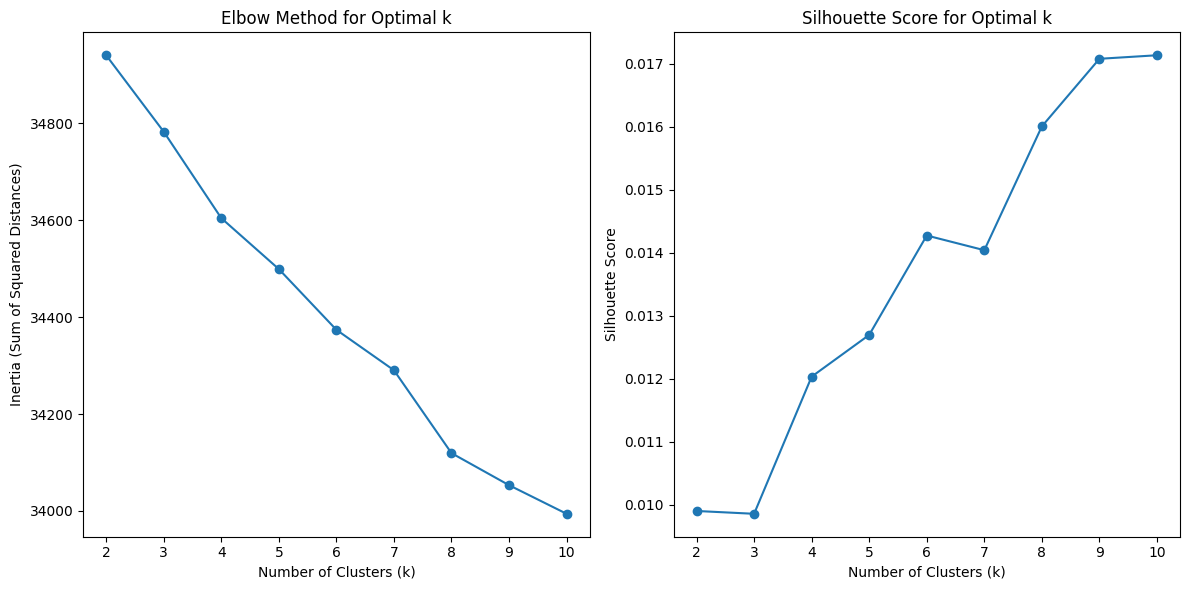

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# k_values의 범위를 필요에 따라 조절
k_values = range(2, 11)

# Elbow method를 사용하여 최적의 k 찾기 (inertia 기준)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia_values.append(kmeans.inertia_)

# Silhouette score 계산
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Elbow method 플로팅
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')

# Silhouette score 플로팅
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Optimal k using the Elbow Method: 10
Optimal k using the Silhouette Score: 10


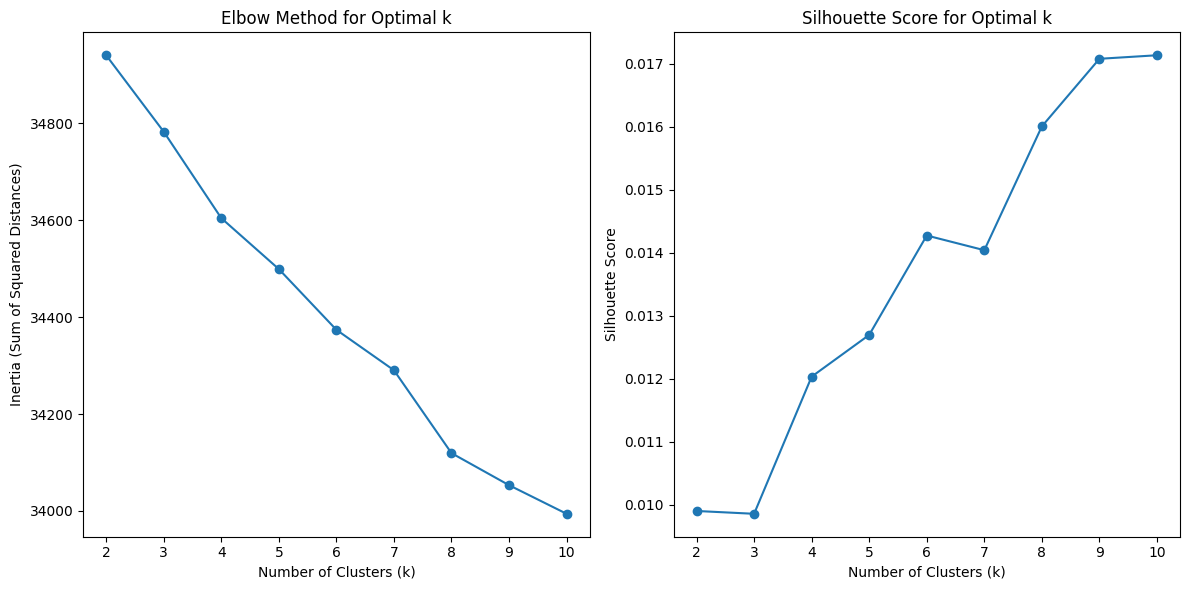

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

k_values = range(2, 11)

# Elbow method를 사용하여 최적의 k 찾기 (inertia 기준)
inertia_values = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix)
    inertia_values.append(kmeans.inertia_)

# Silhouette score 계산
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Elbow method를 사용하여 최적의 k 찾기
optimal_k_elbow = inertia_values.index(min(inertia_values)) + 2  # k가 2부터 시작하므로 2를 더함

# Silhouette score를 사용하여 최적의 k 찾기
optimal_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # k가 2부터 시작하므로 2를 더함

# 결과 출력
print(f"Optimal k using the Elbow Method: {optimal_k_elbow}")
print(f"Optimal k using the Silhouette Score: {optimal_k_silhouette}")

# Elbow method 플로팅
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')

# Silhouette score 플로팅
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.cluster import KMeans

optimal_k = 10

# 최적의 클러스터 수 (k=10)를 사용하여 KMeans 초기화
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# 모델을 feature matrix에 fitting
kmeans.fit(tfidf_matrix)

# 각 데이터 포인트에 대한 클러스터 레이블 얻기
cluster_labels = kmeans.labels_

# 클러스터 레이블을 DataFrame에 할당
df_filtered['cluster_label'] = cluster_labels

# 클러스터 레이블이 있는 DataFrame 표시
print(df_filtered[['title', 'description', 'cluster_label']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                                                   title  \
0      tourist scavenger hunt self guided walking tou...   
1                              tween 2 teen book reviews   
2      planned spontaneity – a blog about hiking arou...   
3                                     - soccerplayer.net   
4      utv accessories & parts | find the best side b...   
...                                                  ...   
36221  nhl stats, history, scores, & records | hockey...   
36222  hockeydb.com - hockey statistics and history f...   
36223                                    the toy peddler   
36224  definitions, meanings, & spanish translations ...   
36225                   the national archives of ireland   

                                             description  cluster_label  
0      explore the city with our 2-3 hour tourist sca...              0  
1                                                    NaN              0  
2      a blog about hiking around the midwest and beyond 

<ipython-input-13-9246e07d1106>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['cluster_label'] = cluster_labels


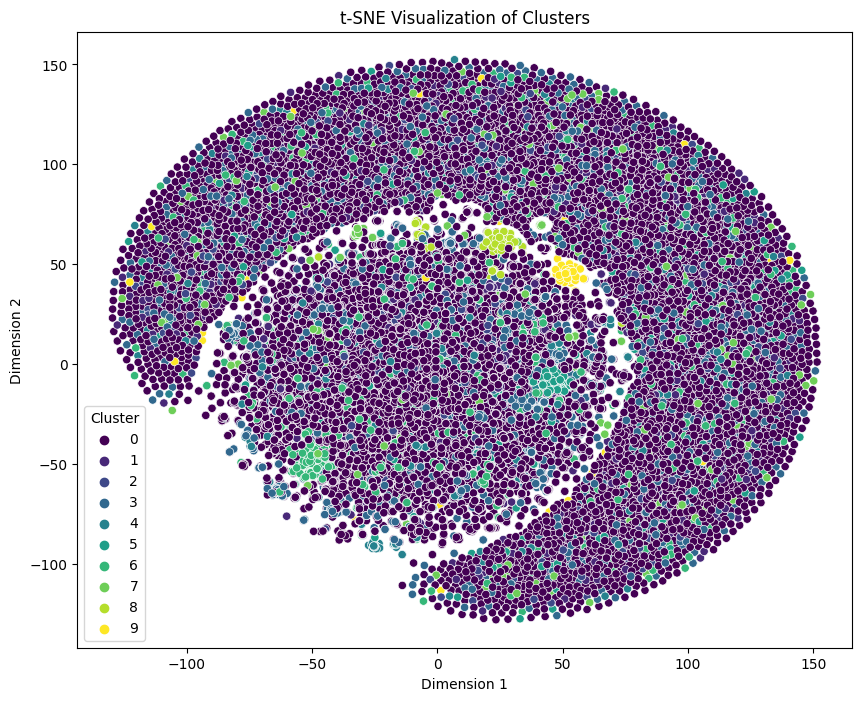

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

optimal_k = 10

# 최적의 클러스터 수로 KMeans 초기화
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# KMeans 모델 fitting
kmeans.fit(tfidf_matrix)

# 클러스터 레이블 얻기
cluster_labels = kmeans.labels_

# TF-IDF 행렬을 밀집 형식으로 변환
dense_tfidf_matrix = tfidf_matrix.toarray()

# 2D로 차원 축소하기 위해 t-SNE 적용
tsne = TSNE(n_components=2, init='random', random_state=42)
tsne_result = tsne.fit_transform(dense_tfidf_matrix)

# t-SNE 결과와 클러스터 레이블을 가진 DataFrame 생성
tsne_df = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = cluster_labels

# seaborn을 사용하여 데이터 포인트 플로팅
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Dimension 1', y='Dimension 2', hue='Cluster', data=tsne_df, palette='viridis', legend='full')
plt.title('t-SNE Visualization of Clusters')
plt.show()

In [ ]:
# 클러스터 할당 및 도메인이 있는 DataFrame 표시
print(df_filtered[['domain', 'title', 'description', 'cluster_label']])

                             domain  \
0          touristscavengerhunt.com   
1           www.tween2teenbooks.com   
2      plannedspontaneityhiking.com   
3                  soccerplayer.net   
4                 www.utvdirect.com   
...                             ...   
36221          hockey-reference.com   
36222                  hockeydb.com   
36223             thetoypeddler.com   
36224                    lexico.com   
36225           nationalarchives.ie   

                                                   title  \
0      tourist scavenger hunt self guided walking tou...   
1                              tween 2 teen book reviews   
2      planned spontaneity – a blog about hiking arou...   
3                                     - soccerplayer.net   
4      utv accessories & parts | find the best side b...   
...                                                  ...   
36221  nhl stats, history, scores, & records | hockey...   
36222  hockeydb.com - hockey statistics and history

In [ ]:
# 'text_combined'이 결합된 'title' 및 'description' 열인 것으로 가정
cluster_summary = df_filtered.groupby('cluster_label')['text_combined'].apply(lambda x: ' '.join(x)).reset_index()
print(cluster_summary)

   cluster_label                                      text_combined
0              0  tourist scavenger hunt self guided walking tou...
1              1  planned spontaneity – a blog about hiking arou...
2              2  the wise sloth | uncensored advice on life unc...
3              3  urban barn furniture and accessories for your ...
4              4  onlyballingame.com sites about gambling owen a...
5              5  utv accessories & parts | find the best side b...
6              6  latest mumbai news | india news | entertainmen...
7              7  ultra secure direct ultra secure are a family ...
8              8  ð flower delivery mumbai - online florist m...
9              9  telefix products powered by prestashop www.mae...


In [ ]:
# 클러스터 요약을 CSV 파일로 내보내기
cluster_summary.to_csv('cluster_summary.csv', index=False)

In [ ]:
# 무작위 샘플링 (10행)
random_sample = df_filtered.sample(10)
print(random_sample[['domain', 'title', 'description', 'cluster_label']])

                             domain  \
5158                elinewyork.shop   
20026            www.printexpert.my   
22470      www.animenewsnetwork.com   
27100           isabellenhuette.net   
17710  maureenholland.wordpress.com   
33001               wordcounter.net   
30017      www.giantsonlinefans.com   
14936       www.mydesignfile.com.au   
31202  missmesmerized.wordpress.com   
18744                 flyermall.com   

                                                                                                                              title  \
5158                                                                                    eli newyork shop – k-style women's clothing   
20026                                                           print expert - no. 1 printing shop malaysia | best printing service   
22470                                                                                                            anime news network   
27100                         

In [ ]:
# 클러스터링된 데이터를 CSV 파일로 내보내기
df_filtered.to_csv('clustered_data.csv', index=False)